## Part 1: Supervised Learning_detecting Cracks in Concrete Surface

### Programmed by Aksa Villamthanam Xavier (Matr.-No.430503)

##### 1. CNN Model is used to classify the crack images.
##### 2. Created dataframes to input features for machine learning.
##### 3. Split into 80% training data, 15% validation data and 5% test data.

---------

### Import Used Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score

import tensorflow as tf


### Get Positive & Negative Directories

In [3]:
positive_dir = Path(r"C:\Users\aksa\Videos\AKSA\Positive")
negative_dir = Path(r"C:\Users\aksa\Videos\AKSA\Negative")




### Creating DataFrames

In [4]:
def generate_df(img_dir, label):
    

    file_paths = pd.Series(list(img_dir.glob(r'*.jpg')), name='Filepath', dtype='object').astype(str)

    labels = pd.Series(label, name='Label', index=file_paths.index)
    df = pd.concat([file_paths, labels], axis=1)
    
    return df

In [5]:
positive_df = generate_df(positive_dir, 'POSITIVE')
negative_df = generate_df(negative_dir, 'NEGATIVE')

# concatenate both positive and negative df
all_df = pd.concat([positive_df, negative_df], axis=0).sample(frac=1, random_state=1).reset_index(drop=True)


### Split the DataSet

In [38]:
from sklearn.model_selection import train_test_split
import tensorflow as tf


# Splitting into train and rest (validation + test)
train_df, rest_df = train_test_split(all_df, train_size=0.8, random_state=1)

# Splitting the rest into validation and test
validation_df, test_df = train_test_split(rest_df, train_size=0.75, random_state=1)


# Loading Image Data
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# Print the size of each set
print("Train set size:", len(train_df))
print("Validation set size:", len(validation_df))
print("Test set size:", len(test_df))



Train set size: 32000
Validation set size: 6000
Test set size: 2000


In [41]:

train_data = train_gen.flow_from_dataframe(train_df, 
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120, 120), 
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True )

val_data = train_gen.flow_from_dataframe(val_df, 
                                        x_col='Filepath',
                                        y_col='Label',
                                        target_size=(120, 120), 
                                        color_mode='rgb',
                                        class_mode='binary',
                                        batch_size=32,
                                        shuffle=False)

test_data = test_gen.flow_from_dataframe(test_df, 
                                         x_col='Filepath',
                                         y_col='Label',
                                         target_size=(120, 120), 
                                         color_mode='rgb',
                                         class_mode='binary',
                                         batch_size=32,
                                         shuffle=False)


Found 32000 validated image filenames belonging to 2 classes.
Found 4800 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


In [42]:
test_data

### Training the DataSet

In [43]:
inputs = tf.keras.Input(shape=(120,120,3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [44]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [45]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [46]:
# print model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 32)               0   

In [47]:
history = model.fit(train_data, validation_data=val_data, epochs=14, 
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=3,
                                                              restore_best_weights=True)
                             ])

Epoch 1/14
1000/1000 [==============================] - 101s 100ms/step - loss: 0.4115 - accuracy: 0.8340 - val_loss: 0.1657 - val_accuracy: 0.9656
Epoch 2/14
1000/1000 [==============================] - 86s 86ms/step - loss: 0.1212 - accuracy: 0.9661 - val_loss: 0.0940 - val_accuracy: 0.9681
Epoch 3/14
1000/1000 [==============================] - 84s 84ms/step - loss: 0.0864 - accuracy: 0.9739 - val_loss: 0.0649 - val_accuracy: 0.9806
Epoch 4/14
1000/1000 [==============================] - 89s 89ms/step - loss: 0.0737 - accuracy: 0.9777 - val_loss: 0.0693 - val_accuracy: 0.9783
Epoch 5/14
1000/1000 [==============================] - 92s 92ms/step - loss: 0.0694 - accuracy: 0.9787 - val_loss: 0.0750 - val_accuracy: 0.9833
Epoch 6/14
1000/1000 [==============================] - 102s 102ms/step - loss: 0.0636 - accuracy: 0.9802 - val_loss: 0.0530 - val_accuracy: 0.9829
Epoch 7/14
1000/1000 [==============================] - 87s 87ms/step - loss: 0.0637 - accuracy: 0.9813 - val_loss: 0.06

In [48]:
fig = px.line(history.history,
             y=['loss', 'val_loss'],
             labels={'index':'Epoch'},
             title='Training and Validation Loss over Time')

fig.show()

### Final Results

### Plotting

In [49]:
def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    accuracy = results[1]
    
    print(f'Test Loss {loss:.5f}')
    print(f'Test Accuracy {accuracy * 100:.2f} %')
    
    # predicted y values
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(int))  # Use 'int' directly
    y_certain = np.squeeze((model.predict(test_data)).astype(int))      # Use 'int' directly
    
    conf_matr = confusion_matrix(test_data.labels, y_pred)
    
    class_report = classification_report(test_data.labels, y_pred,
                                         target_names=['NEGATIVE', 'POSITIVE'])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matr, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.xticks(ticks=np.arange(2) + 0.5, labels=['NEGATIVE', 'POSITIVE'])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=['NEGATIVE', 'POSITIVE'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('r2 Score : ', r2_score(test_data.labels, y_pred))
    print()
    print('Classification Report :\n......................\n', class_report)


Test Loss 0.05102
Test Accuracy 98.30 %
63/63 [==============================] - 3s 50ms/step


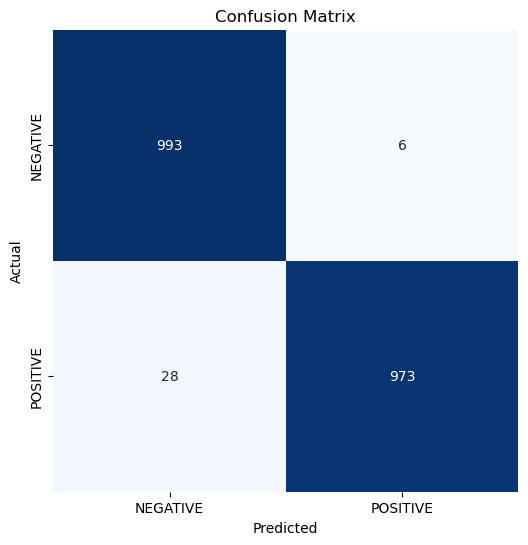

r2 Score :  0.931999931999932

Classification Report :
......................
               precision    recall  f1-score   support

    NEGATIVE       0.97      0.99      0.98       999
    POSITIVE       0.99      0.97      0.98      1001

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [50]:
evaluate_model(model, test_data)

### Input new Test 



### Testing New DataSet

Found 1 validated image filenames belonging to 1 classes.
1/1 [==============================] - 0s 47ms/step


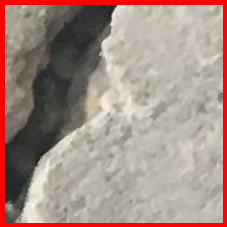

Test Image: Positive (Crack) (Confidence: 1.000000)


In [56]:
from PIL import ImageDraw
import IPython.display as display
import random

def test_random_image_with_generator(data_generator, model):
    # Select a random test image from the DataFrame
    random_index = random.randint(0, len(test_df) - 1)
    test_data_single = data_generator.flow_from_dataframe(test_df.iloc[[random_index]], 
                                                          x_col='Filepath',
                                                          y_col='Label',
                                                          target_size=(120, 120), 
                                                          color_mode='rgb',
                                                          batch_size=1,
                                                          shuffle=False,
                                                          seed=42)
    
    image_path = test_df.iloc[random_index]['Filepath']
    image = Image.open(image_path)
    
    # Predict y value
    y_pred = (model.predict(test_data_single) >= 0.5).astype(int)[0, 0]
    y_certain = model.predict(test_data_single)[0, 0].round(6)

    result = 'Positive (Crack)' if y_pred == 1 else 'Negative (Not Crack)'
    
    # Visualize the image with potential crack highlighting
    draw = ImageDraw.Draw(image)
    if y_pred == 1:  # If crack is detected, draw a bounding box or mark it in some way
        draw.rectangle([(0, 0), image.size], outline='red', width=5)
    
    display.display(image)
    print(f"Test Image: {result} (Confidence: {y_certain:.6f})")

# Assuming you have already defined and trained the 'model'
test_random_image_with_generator(test_gen, model)
